In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# 입력 이미지 설정
input_img = Input(shape=(28, 28, 1))

# 인코더 정의
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # 32개의 3x3 컨볼루션 필터를 적용하고 활성화 함수로 ReLU 사용
x = MaxPooling2D((2, 2), padding='same')(x)  # MaxPooling을 통해 이미지 크기를 줄임
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # 더 깊은 레이어의 컨볼루션

# 디코더 정의
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)  # 인코더와 대칭되는 컨볼루션 레이어
x = UpSampling2D((2, 2))(x)  # 업샘플링을 통해 이미지 크기를 확대
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # 최종 출력 레이어

# Autoencoder 모델 정의
autoencoder = Model(input_img, decoded)  # 입력과 출력을 연결하여 Autoencoder 모델 생성
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # 옵티마이저 및 손실 함수 설정

# 데이터 불러오기 및 학습
# 예: MNIST 데이터셋 사용
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()  # MNIST 데이터셋 불러오기
x_train = x_train.astype('float32') / 255.  # 이미지를 0과 1 사이의 값으로 정규화
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))  # 이미지 형태 조정 (채널 차원 추가)
x_test = x_test.reshape((len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train,  # 입력과 출력을 동일하게 설정하여 자기 자신을 재구성하도록 학습
                epochs=10,  # 학습 에포크 수
                batch_size=128,  # 배치 크기
                shuffle=True,  # 데이터 섞기
                validation_data=(x_test, x_test))  # 검증 데이터 사용하여 학습


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 19s 10ms/step - loss: 0.0835 - val_loss: 0.0638
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0635 - val_loss: 0.0627
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0627 - val_loss: 0.0621
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0622 - val_loss: 0.0617
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0618 - val_loss: 0.0617
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0615 - val_loss: 0.0611
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0613 - val_loss: 0.0608
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0611 - val_loss: 0.0606
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0609 - val_loss: 0.0605
Epoch 10/10
469/469 [=========

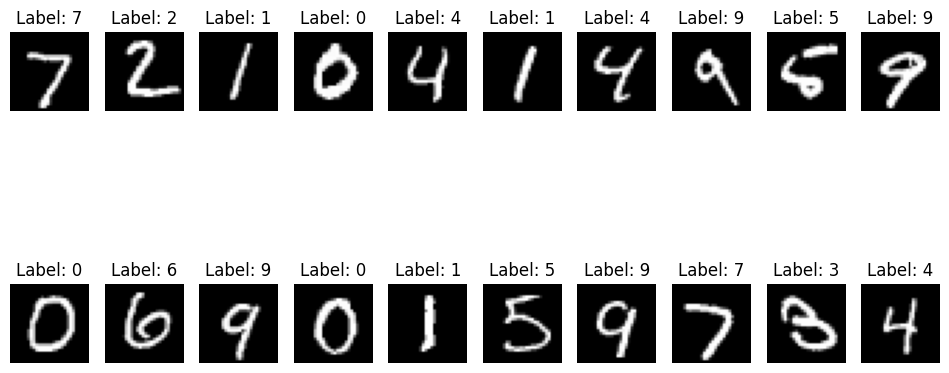

In [ ]:
import matplotlib.pyplot as plt

# MNIST 데이터셋 불러오기
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 테스트 이미지 중 처음 20개 이미지를 시각화
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

MNIST 테스트 데이터 중 하나를 선택하고, 선택한 이미지에 가우시안 노이즈를 추가

노이즈가 추가된 이미지를 Autoencoder 모델에 전달하여 노이즈가 제거된 이미지를 생성

원본 이미지, 노이즈가 추가된 이미지, 노이즈 제거된 이미지를 시각화

1/1 [==============================] - 0s 79ms/step


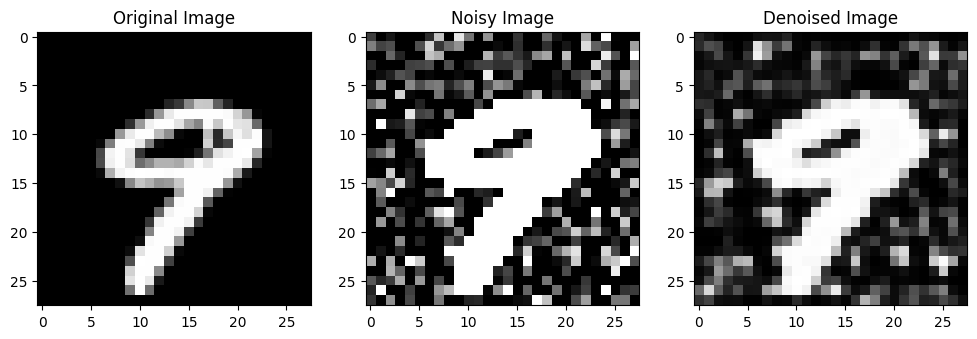

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋에서 테스트 이미지 선택
test_image = x_test[9]  # MNIST 테스트 데이터 중 이미지를 선택

# 테스트 이미지에 노이즈 추가 (예: 가우시안 노이즈)
noise_factor = 0.5  # 노이즈 강도 설정

# 가우시안 노이즈를 생성하여 노이즈를 이미지에 추가
noisy_image = test_image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_image.shape)

# 이미지의 픽셀 값을 0과 1 사이로 클리핑
noisy_image = np.clip(noisy_image, 0., 1.)

# 노이즈가 추가된 이미지를 모델에 전달하여 노이즈 제거 수행
denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))[0]

# 원본 이미지, 노이즈가 추가된 이미지, 노이즈 제거된 이미지를 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_image.squeeze(), cmap='gray')  # 원본 이미지 시각화

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image.squeeze(), cmap='gray')  # 노이즈가 추가된 이미지 시각화

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image.squeeze(), cmap='gray')  # 노이즈 제거된 이미지 시각화

plt.show()
